# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore"),

(None,)

# Importing and Loading dataset

In [2]:
df=pd.read_csv("Loan_Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dataset shape:

In [4]:
df.shape

(614, 13)

# Checking the missing values:

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# first we will fill the missing values inn "LoanAmount" and "Credit_History" by the mean and median of the respectivr variable

In [7]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [8]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# lets drop all the missing values remaining

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.shape

(542, 13)

# Exploratory Data Analysis (EDA):

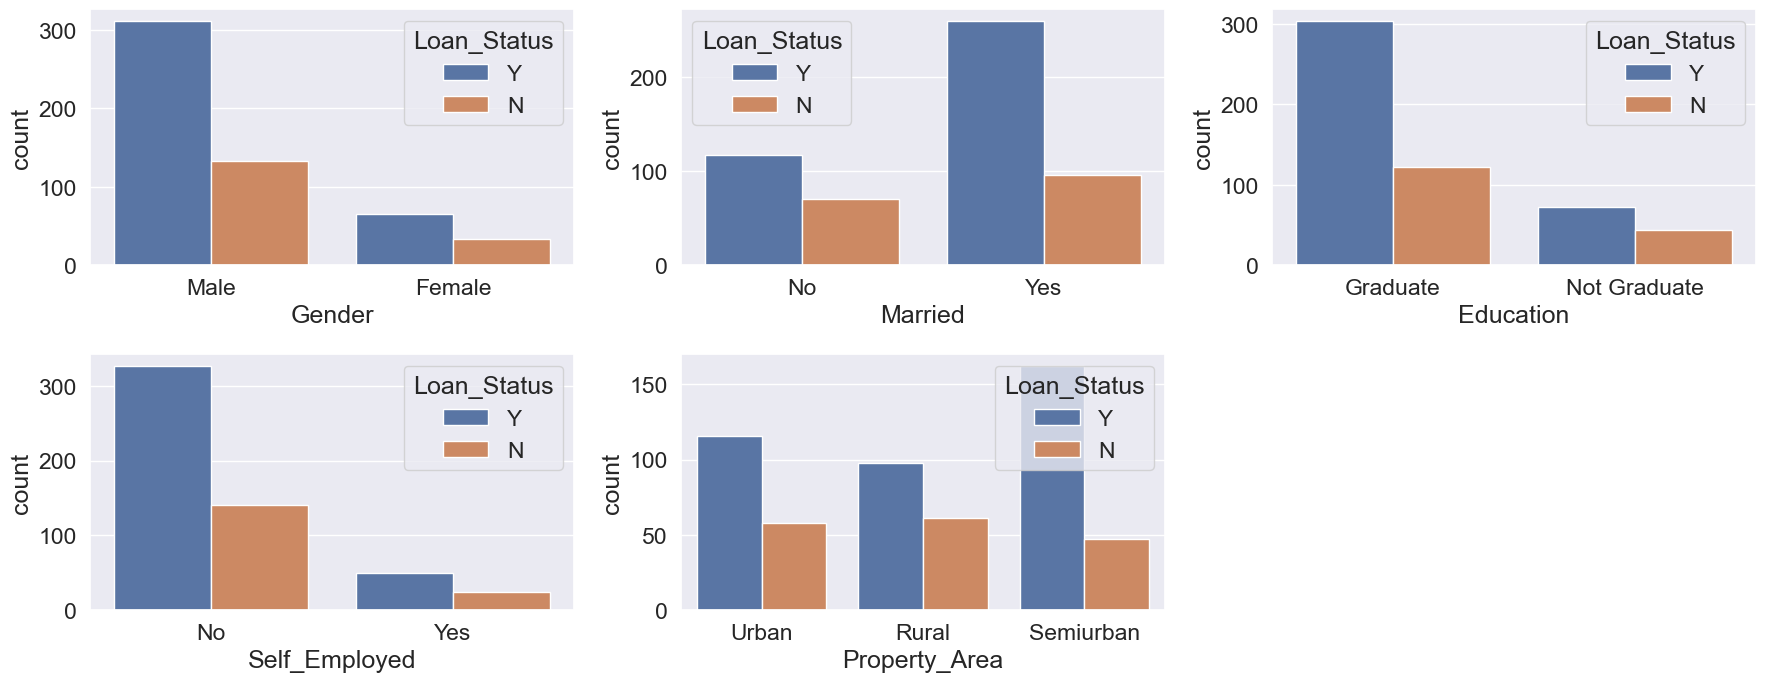

In [13]:
plt.figure(figsize=(18, 10))
sns.set(font_scale=1.5)

plt.subplot(331)
sns.countplot(x="Gender", hue="Loan_Status", data=df)

plt.subplot(332)
sns.countplot(x="Married", hue="Loan_Status", data=df)

plt.subplot(333)
sns.countplot(x="Education", hue="Loan_Status", data=df)

plt.subplot(334)
sns.countplot(x="Self_Employed", hue="Loan_Status", data=df)

plt.subplot(335)
sns.countplot(x="Property_Area", hue="Loan_Status", data=df)

plt.tight_layout()
plt.show()


# Lets replace the variable values into numerical form & display the value counts

In [25]:
df['Loan_Status'].replace('Y', 1, inplace=True)
df['Loan_Status'].replace('N', 0, inplace=True)

df['Loan_Status'].value_counts()


Loan_Status
1    376
0    166
Name: count, dtype: int64

In [15]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [16]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [17]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [18]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [19]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [20]:
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [21]:
df["LoanAmount"].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
61.000000      1
146.000000     1
142.000000     1
496.000000     1
253.000000     1
Name: count, Length: 195, dtype: int64

In [22]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [23]:
df["Credit_History"].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

# Final Dataframe

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Importing Packages for classification algorithms

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the data into Train and Test set

In [30]:
x = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

# Logistic Regression (LR)

In [33]:
model= LogisticRegression()
model.fit(x_train,y_train)

lr_prediction = model.predict(x_test)
print("Logistic Regration Accuracy = ", metrics.accuracy_score(lr_prediction,y_test))

Logistic Regration Accuracy =  0.7914110429447853


In [35]:
print("y_predicted", lr_prediction)
print("y_test", y_test)

y_predicted [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_test [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


# Conclusion: